In [ ]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats.mstats import winsorize
import pickle




# Libraries for Data Preprocessing
import glob
#from numpy import sort
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec
#from xgboost import plot_importance, to_graphviz
#from sklearn.model_selection import StratifiedKFold


# Importing ML Model packages
#from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV
#import sklearn.neighbors
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

# Libraries for measuring accuracy
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, matthews_corrcoef, roc_curve, make_scorer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

from matplotlib.text import Text



In [2]:
# Load the data from a CSV file
data = pd.read_csv("https://raw.githubusercontent.com/GraceOluwafemi/Msc-Project/main/diabetes_data.csv")

# Print the first few rows of the data
print (data.head())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [3]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
data = data.rename(columns={'Diabetes_binary': 'Diabetes_Status'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_Status       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
data['Diabetes_Status'] = data['Diabetes_Status'].astype(int)
data['HighBP'] = data['HighBP'].astype(int)
data['HighChol'] = data['HighChol'].astype(int)
data['CholCheck'] = data['CholCheck'].astype(int)
data['Smoker'] = data['Smoker'].astype(int)
data['Stroke'] = data['Stroke'].astype(int)
data['HeartDiseaseorAttack'] = data['HeartDiseaseorAttack'].astype(int)
data['PhysActivity'] = data['PhysActivity'].astype(int)
data['Fruits'] = data['Fruits'].astype(int)
data['Veggies'] = data['Veggies'].astype(int)
data['HvyAlcoholConsump'] = data['HvyAlcoholConsump'].astype(int)
data['AnyHealthcare'] = data['AnyHealthcare'].astype(int)
data['NoDocbcCost'] = data['NoDocbcCost'].astype(int)
data['DiffWalk'] = data['DiffWalk'].astype(int)
data['Sex'] = data['Sex'].astype(int)
data['Age'] = data['Age'].astype(int)
data['Education'] = data['Education'].astype(int)
data['Income'] = data['Income'].astype(int)

print(data.head())

   Diabetes_Status  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0       1         1          1  40.0       1       0   
1                0       0         0          0  25.0       1       0   
2                0       1         1          1  28.0       0       0   
3                0       1         0          1  27.0       0       0   
4                0       1         1          1  24.0       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0      5.0      18.0      15.0         1    0    9     

In [6]:
data.describe()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
data.isna().sum()

Diabetes_Status         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
data['Diabetes_Status'].value_counts()

0    218334
1     35346
Name: Diabetes_Status, dtype: int64

**Exploratory Data Analysis**

 Univariate Analysis

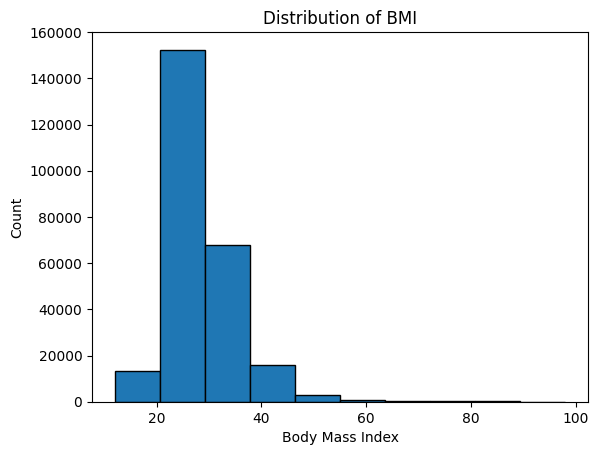

In [ ]:
# Generate the histogram
plt.hist(data['BMI'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Body Mass Index')
plt.ylabel('Count')
plt.title('Distribution of BMI')

# Show the histogram
plt.show()

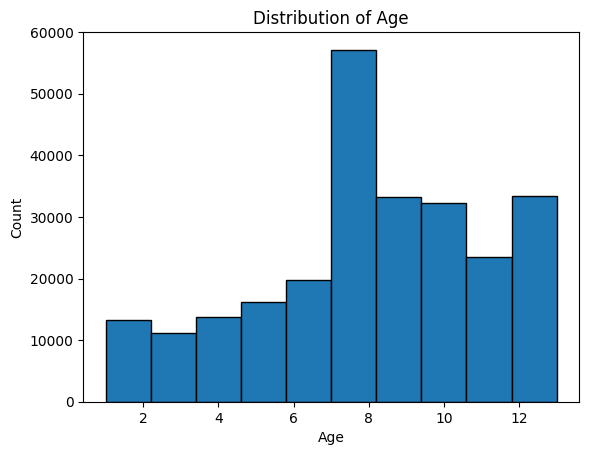

In [ ]:
# Generate the histogram
plt.hist(data['Age'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# Show the histogram
plt.show()

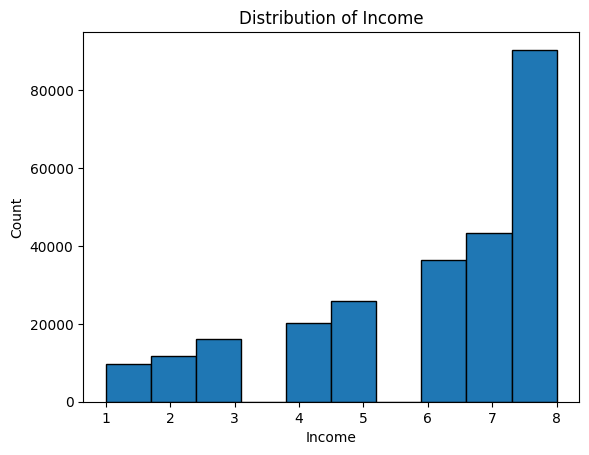

In [ ]:
# Generate the histogram
plt.hist(data['Income'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')

# Show the histogram
plt.show()

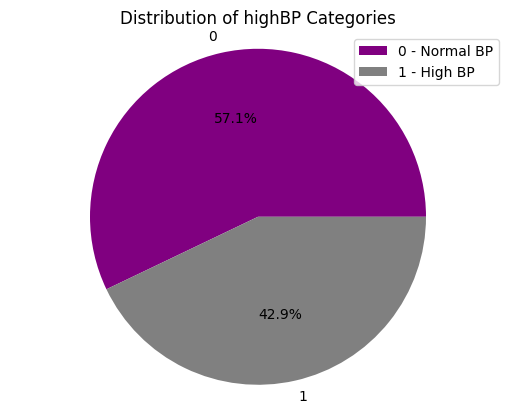

In [ ]:
# Count the occurrences of each category
category_counts = data['HighBP'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['purple', 'grey'])

# Add legend
legend_labels = ['0 - Normal BP', '1 - High BP']
plt.legend(legend_labels, loc='best')

# Set title and aspect ratio
plt.title('Distribution of highBP Categories')
plt.axis('equal')

# Display the chart
plt.show()


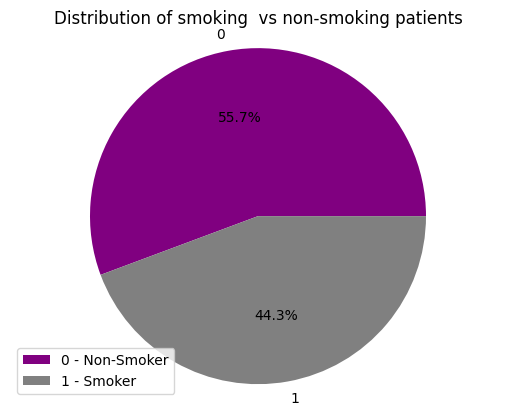

In [ ]:
# Count the occurrences of each category
category_counts = data['Smoker'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['purple', 'grey'])

# Add legend
legend_labels = ['0 - Non-Smoker', '1 - Smoker']
plt.legend(legend_labels, loc='best')

# Set title and aspect ratio
plt.title('Distribution of smoking  vs non-smoking patients')
plt.axis('equal')

# Display the chart
plt.show()

 Bivariate Analysis

<Figure size 500x400 with 0 Axes>

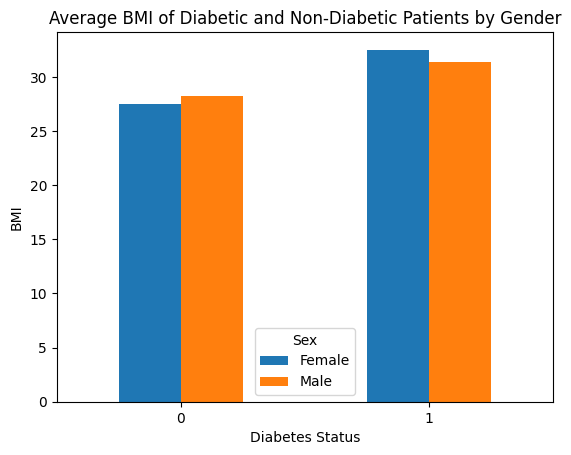

In [ ]:
import matplotlib.pyplot as plt

# Map sex values to more understandable labels
data['Sex'] = data['Sex'].replace({'0': 'Female', '1': 'Male'})

plt.figure(figsize=(5, 4))
ax = data.groupby(['Diabetes_Status', 'Sex'])['BMI'].mean().unstack().plot(kind='bar')
plt.title('Average BMI of Diabetic and Non-Diabetic Patients by Gender')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.xticks(rotation=0)

# Create a custom legend
handles, labels = ax.get_legend_handles_labels()
custom_labels = {'0': 'Female', '1': 'Male'}
new_labels = [custom_labels[label] for label in labels]
ax.legend(handles, new_labels, title='Sex')

plt.show()


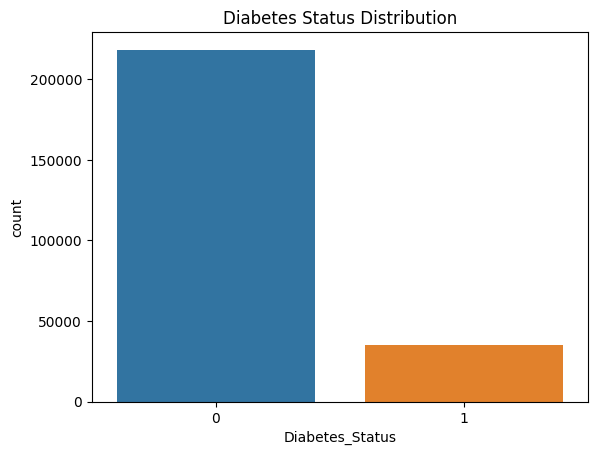

In [ ]:
# Class distribution
sns.countplot(x='Diabetes_Status', data=data)
plt.title('Diabetes Status Distribution')
plt.show()

Multivariant Analysis

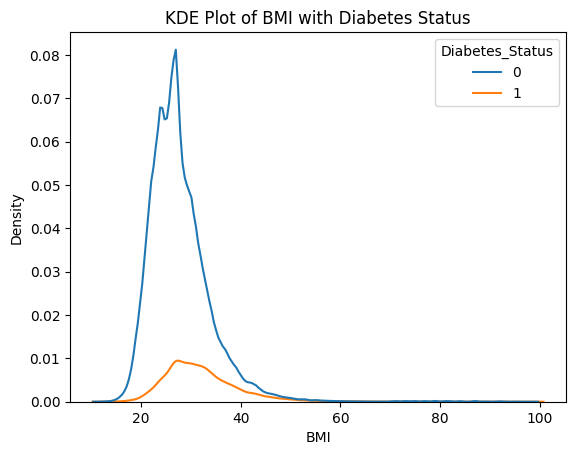

In [ ]:
# Create the KDE plot
sns.kdeplot(data=data, x='BMI', hue='Diabetes_Status')

# Add labels and a title
plt.xlabel('BMI')
plt.title('KDE Plot of BMI with Diabetes Status')

# Show the plot
plt.show()

**Handling Outliers**

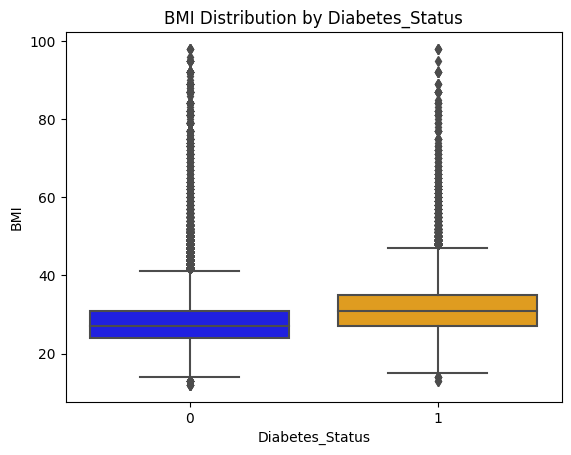

In [9]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='BMI', data=data, palette=['blue', 'orange'])
plt.title('BMI Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('BMI')

# Display the plot
plt.show()


In [10]:

# Replace values in the 'BMI' column with mean value of 28.4 where 'Diabetes_Status' is equal to 0 and 'BMI' is greater than 39
data.loc[(data["Diabetes_Status"] == 0) & (data["BMI"] > 39), 'BMI'] = 28.4

# Replace values in the 'BMI' column with mean value of 28.4 where 'Diabetes_Status' is equal to 0 and 'BMI' is less than 10
data.loc[(data["Diabetes_Status"] == 0) & (data["BMI"] < 15), 'BMI'] = 28.4

# Replace values in the 'BMI' column with mean value of 28.4 where 'Diabetes_Status' is equal to 0 and 'BMI' is greater than 43
data.loc[(data["Diabetes_Status"] == 1) & (data["BMI"] > 43), 'BMI'] = 28.4

# Replace values in the 'BMI' column with mean value of 28.4 where 'Diabetes_Status' is equal to 0 and 'BMI' is less than 17
data.loc[(data["Diabetes_Status"] == 1) & (data["BMI"] < 17), 'BMI'] = 28.4


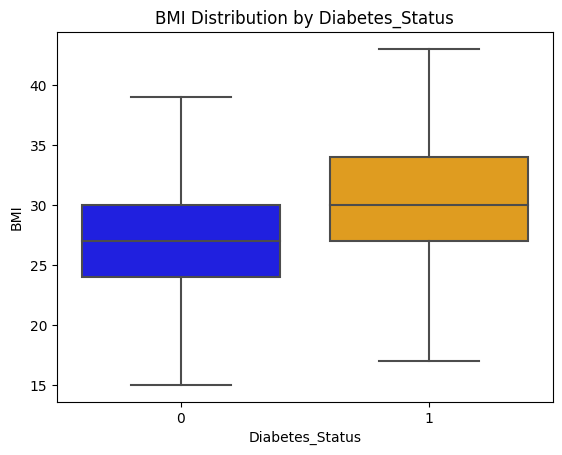

In [11]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='BMI', data=data, palette=['blue', 'orange'])
plt.title('BMI Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('BMI')

# Display the plot
plt.show()


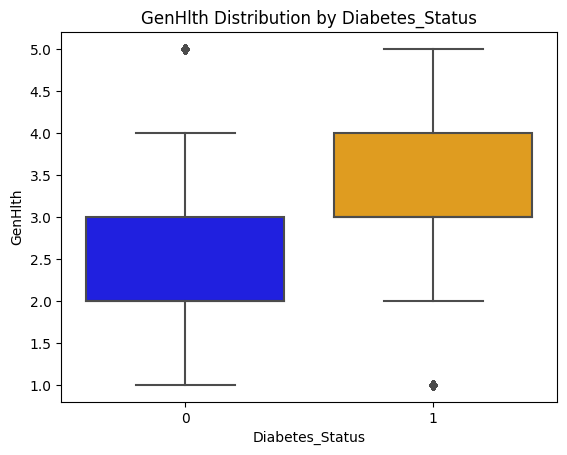

In [12]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='GenHlth', data=data, palette=['blue', 'orange'])
plt.title('GenHlth Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('GenHlth')

# Display the plot
plt.show()

In [13]:
# Replace values in the 'GenHlth' column with mean value of 2.5 where 'Diabetes_Status' is equal to 0 and 'GenHlth' is greater than 4
data.loc[(data["Diabetes_Status"] == 0) & (data["GenHlth"] > 4), 'GenHlth'] = 2.5

# Replace values in the 'GenHlth' column with mean value of 2.5 where 'Diabetes_Status' is equal to 0 and 'GenHlth' is less than 1.5
data.loc[(data["Diabetes_Status"] == 1) & (data["GenHlth"] < 1.5), 'GenHlth'] = 2.5

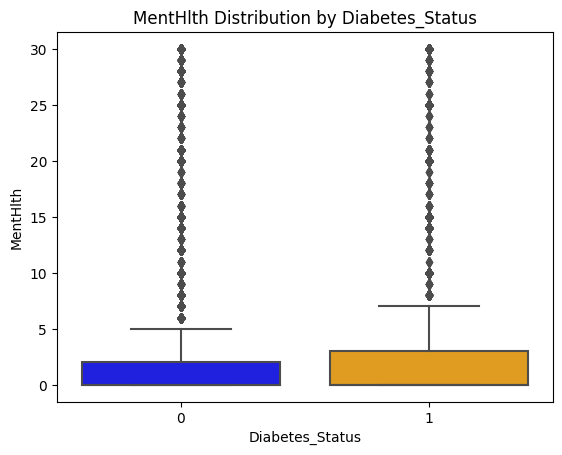

In [14]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='MentHlth', data=data, palette=['blue', 'orange'])
plt.title('MentHlth Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('MentHlth')

# Display the plot
plt.show()

In [15]:
# Replace values in the 'MentHlth' column with mean value of 3.2 where 'Diabetes_Status' is equal to 0 and 'MentHlth' is greater than 4
data.loc[(data["Diabetes_Status"] == 0) & (data["MentHlth"] > 5), 'MentHlth'] = 3.2

# Replace values in the 'MentHlth' column with mean value of 3.2 where 'Diabetes_Status' is equal to 1 and 'MentHlth' is greater than 6
data.loc[(data["Diabetes_Status"] == 1) & (data["MentHlth"] > 6), 'MentHlth'] = 3.2

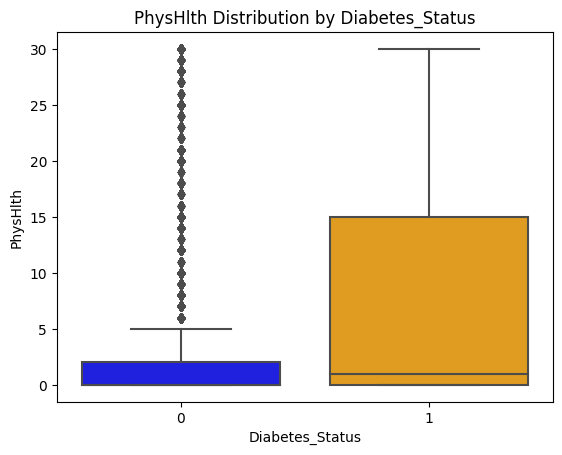

In [16]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='PhysHlth', data=data, palette=['blue', 'orange'])
plt.title('PhysHlth Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('PhysHlth')

# Display the plot
plt.show()

In [17]:
# Replace values in the 'PhysHlth' column with mean value of 4.4 where 'Diabetes_Status' is equal to 0 and 'PhysHlth' is greater than 5
data.loc[(data["Diabetes_Status"] == 0) & (data["PhysHlth"] > 5), 'PhysHlth'] = 4.4



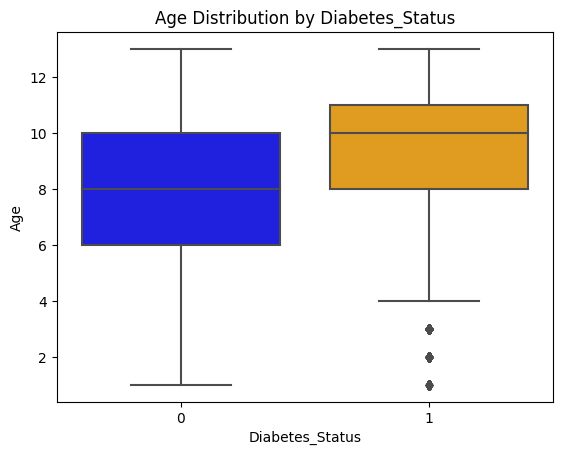

In [18]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='Age', data=data, palette=['blue', 'orange'])
plt.title('Age Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('Age')

# Display the plot
plt.show()

In [19]:
# Replace values in the 'Age' column with mean value of 8 where 'Diabetes_Status' is equal to 1 and 'Age' is less than 4
data.loc[(data["Diabetes_Status"] == 1) & (data["Age"] < 4), 'Age'] = 8

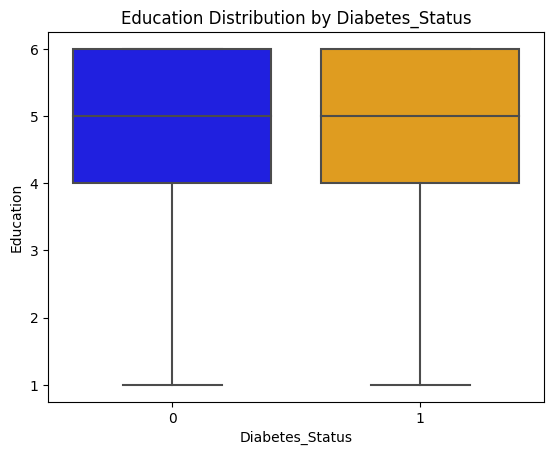

In [20]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='Education', data=data, palette=['blue', 'orange'])
plt.title('Education Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('Education')

# Display the plot
plt.show()

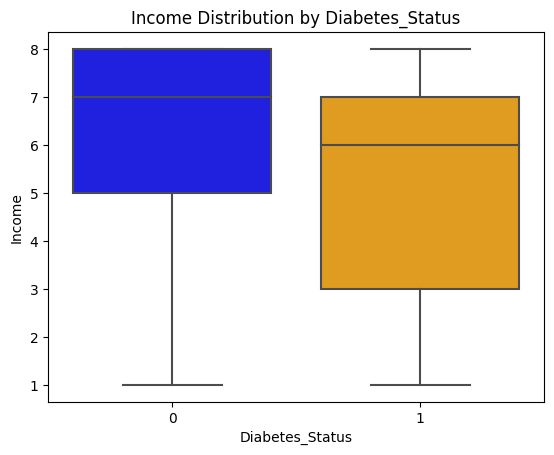

In [21]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='Income', data=data, palette=['blue', 'orange'])
plt.title('Income Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('Income')

# Display the plot
plt.show()

In [35]:
#del new_data

In [36]:
# Create a copy of the original dataset
new_data = data.copy()

Feature Selection

In [37]:
y = new_data.Diabetes_Status
x = new_data.drop(["Diabetes_Status"],axis = 1)
columns = x.columns.tolist()

In [ ]:
# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

# Display the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())


Class distribution after oversampling:
0    218334
1    218334
Name: Diabetes_Status, dtype: int64


In [ ]:
# Normalize the features
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_normalized = scaler.fit_transform(X_resampled)

In [ ]:


# Assuming you have your data loaded in X and y
# And the feature names are given as a list
feature_names = ['HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
                 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'HighBP',
                 'BMI', 'Smoker', 'Fruits', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_resampled)

# Define the evaluation criteria and corresponding weights
weights = [0.4, 0.3,0.3]

# Define the classifier
classifier = LogisticRegression()

# Calculate the evaluation scores (accuracy, precision, recall) using cross-validation
def evaluate_features(X, y_resampled, classifier):
    scores = []
    scoring = ['roc_auc', 'precision','f1']

    for feature in range(X.shape[1]):
        X_feature = X[:, feature].reshape(-1, 1)
        score = [np.mean(cross_val_score(classifier, X_feature, y_resampled, cv=5, scoring=scoring[i])) for i in range(len(scoring))]
        scores.append(score)

    return np.array(scores)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, y_resampled, test_size=0.3, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, y_resampled, test_size=0.3, random_state=42)

# Calculate the evaluation scores for each feature on the training set
evaluation_scores_train = evaluate_features(X_train, Y_train, classifier)

# Calculate the weighted sum for each feature
weighted_sums_train = np.dot(evaluation_scores_train, weights)

# Sort the features based on the weighted sum
ranked_features_indices = np.argsort(weighted_sums_train)[::-1]
ranked_features = [feature_names[idx] for idx in ranked_features_indices]
ranks = np.arange(1, len(ranked_features) + 1)

# Create a DataFrame to store the ranked features and their corresponding scores
ranked_features_df = pd.DataFrame({'Feature': ranked_features, 'Score': weighted_sums_train, 'Rank': ranks})
#ranked_features_df = pd.DataFrame({'Feature': ranked_features, 'Rank': ranks})

# Sort the DataFrame based on the Rank column in descending order
ranked_features_df = ranked_features_df.sort_values(by='Score', ascending=True)

# Display the ranked features with their corresponding scores and ranks
print("Ranked features:")
print(ranked_features_df.to_string(index=False))



Ranked features:
             Feature    Score  Rank
                 Sex 0.460332    13
        PhysActivity 0.484130    15
                 Age 0.511645     6
           Education 0.514809    10
            DiffWalk 0.520121    18
   HvyAlcoholConsump 0.521880     9
            MentHlth 0.545524     5
              Stroke 0.546885    12
       AnyHealthcare 0.559118    11
           CholCheck 0.561275     3
             GenHlth 0.577448     8
              Fruits 0.585213    20
              Income 0.591970     7
         NoDocbcCost 0.606799    16
                 BMI 0.610374    21
             Veggies 0.631982    19
            PhysHlth 0.640039    17
HeartDiseaseorAttack 0.648957     4
            HighChol 0.653584     2
              Smoker 0.696132     1
              HighBP 0.727568    14


In [ ]:
#del new_data1

In [40]:
# Create a new DataFrame with the output
new_data1 = new_data.copy()

In [41]:
# Drop columns from the DataFrame
columns_to_drop = ['Sex','PhysActivity','Age','Education','DiffWalk','HvyAlcoholConsump']
#columns_to_drop = ['Income','PhysActivity','Education','MentHlth','GenHlth','PhysHlth','AnyHealthcare','NoDocbcCost','HvyAlcoholConsump','Fruits','DiffWalk','Veggies','BMI']
new_data1 = new_data1.drop(columns=columns_to_drop, axis=1)

In [42]:
# 'new_data1' now contains the DataFrame with the specified columns dropped
new_data1.head()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,Fruits,Veggies,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,Income
0,0,1,1,1,28.4,1,0,0,0,1,1,0,2.5,3.2,4.4,3
1,0,0,0,0,25.0,1,0,0,0,0,0,1,3.0,0.0,0.0,1
2,0,1,1,1,28.0,0,0,0,1,0,1,1,2.5,3.2,4.4,8
3,0,1,0,1,27.0,0,0,0,1,1,1,0,2.0,0.0,0.0,6
4,0,1,1,1,24.0,0,0,0,1,1,1,0,2.0,3.0,0.0,4


In [43]:
y_over = new_data1.Diabetes_Status
X_over = new_data1.drop(["Diabetes_Status"],axis = 1)
columns = X_over.columns.tolist()

In [44]:
# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_over, y_over = smote.fit_resample(X_over, y_over)

# Display the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(pd.Series(y_over).value_counts())


Class distribution after oversampling:
0    218334
1    218334
Name: Diabetes_Status, dtype: int64


In [45]:
X_train_over1, X_test_over1, Y_train_over1, Y_test_over1 = train_test_split(X_over ,y_over , test_size = 0.3, random_state = 42)

In [46]:
# Scale the selected features in both training and test sets
scaler = StandardScaler()
X_train_over1 = scaler.fit_transform(X_train_over1)
X_test_over1 = scaler.transform(X_test_over1)


Hyper-Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Define the parameter grids for each classifier
lr_params = {'C': [0.1, 1, 10]}
xgb_params = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5],'learning_rate': [0.01, 0.1, 0.2]}
vc_params = {'voting': [ 'soft']}

# Initialize classifiers
lr = LogisticRegression()
xgb_classifier = xgb.XGBClassifier()
vc = VotingClassifier(estimators=[('lr', lr), ('xgb', xgb_classifier)], voting='soft')

# Perform grid search with cross-validation for Logistic Regression
lr_gs = GridSearchCV(lr, lr_params, cv=5, n_jobs=-1, scoring='precision')
lr_gs.fit(X_train_over1, Y_train_over1)

# Perform grid search with cross-validation for XGBoost
xgb_gs = GridSearchCV(xgb_classifier, xgb_params, cv=5, n_jobs=-1, scoring='precision' )
xgb_gs.fit(X_train_over1, Y_train_over1)

# Perform grid search with cross-validation for the Voting Classifier
vc_gs = GridSearchCV(vc, vc_params, cv=5, n_jobs=-1)
vc_gs.fit(X_train_over1, Y_train_over1)

# Get the best parameters and best score for each model
best_lr_params = lr_gs.best_params_
best_lr_score = lr_gs.best_score_

best_xgb_params = xgb_gs.best_params_
best_xgb_score = xgb_gs.best_score_

best_vc_params = vc_gs.best_params_
best_vc_score = vc_gs.best_score_

# Print the best parameters and scores for each model
print("Best Logistic Regression Parameters:", best_lr_params)
print("Best Logistic Regression Score:", best_lr_score)

print("Best XGBoost Parameters:", best_xgb_params)
print("Best XGBoost Score:", best_xgb_score)

print("Best Voting Classifier Parameters:", best_vc_params)
print("Best Voting Classifier Score:", best_vc_score)


Best Logistic Regression Parameters: {'C': 0.1}
Best Logistic Regression Score: 0.7028498322473735
Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Best XGBoost Score: 0.7122064175583054
Best Voting Classifier Parameters: {'voting': 'soft'}
Best Voting Classifier Score: 0.7113689065312212


Algorithm Modelling

In [47]:
# Create Logistics Regression classifier
lg = LogisticRegression(solver='liblinear', C= 0.1)

# Train the classifier
lg.fit(X_train_over1, Y_train_over1)

# Make predictions on the testing set
y_pred_lgover = lg.predict(X_test_over1)

y_pred_lgover1 = lg.predict_proba(X_test_over1)[:, 1]
fpr_lgover, tpr_lgover, thresholds_lgover = roc_curve(Y_test_over1, y_pred_lgover1)
auc_lgover = roc_auc_score(Y_test_over1, y_pred_lgover1)

# Evaluate the model
#print('Accuracy:', accuracy_score(Y_test_over, y_pred_lg))
#print('Confusion Matrix:', confusion_matrix(Y_test_over, y_pred_lg))

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test_over1, y_pred_lgover))
print('Precision:', precision_score(Y_test_over1, y_pred_lgover))
print('Recall:', recall_score(Y_test_over1, y_pred_lgover))
print('AUC:', auc_lgover)
print('Confusion Matrix:')
print(confusion_matrix(Y_test_over1, y_pred_lgover))

# Classification report
class_report = classification_report(Y_test_over1, y_pred_lgover)
print('Classification Report:\n', class_report)

Accuracy: 0.7617880779536034
Precision: 0.7697537583013897
Recall: 0.7460516458483037
AUC: 0.8563794181264461
Confusion Matrix:
[[50998 14596]
 [16610 48797]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.77     65594
           1       0.77      0.75      0.76     65407

    accuracy                           0.76    131001
   macro avg       0.76      0.76      0.76    131001
weighted avg       0.76      0.76      0.76    131001



In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Create Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train_over1, Y_train_over1)

# Make predictions on the testing set
y_pred_nbover = nb.predict(X_test_over1)

y_pred_nbover1 = nb.predict_proba(X_test_over1)[:, 1]
fpr_nbover, tpr_nbover, thresholds_nbover = roc_curve(Y_test_over1, y_pred_nbover1)
auc_nbover = roc_auc_score(Y_test_over1, y_pred_nbover1)

# Evaluate the model
#print('Accuracy:', accuracy_score(Y_test_over, y_pred_nb))
#print('Confusion Matrix:', confusion_matrix(Y_test_over, y_pred_nb))

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test_over1, y_pred_nbover))
print('Precision:', precision_score(Y_test_over1, y_pred_nbover))
print('Recall:', recall_score(Y_test_over1, y_pred_nbover))
print('f1:', f1_score(Y_test_over1, y_pred_nbover))
print('AUC:', auc_nbover)
print('Confusion Matrix:')
print(confusion_matrix(Y_test_over1, y_pred_nbover))


# Classification report
class_report = classification_report(Y_test_over1, y_pred_nbover)
print('Classification Report:\n', class_report)

Accuracy: 0.724879962748376
Precision: 0.7632116735981643
Recall: 0.6509242130047243
f1: 0.7026099297802642
AUC: 0.8273055700228324
Confusion Matrix:
[[52385 13209]
 [22832 42575]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.74     65594
           1       0.76      0.65      0.70     65407

    accuracy                           0.72    131001
   macro avg       0.73      0.72      0.72    131001
weighted avg       0.73      0.72      0.72    131001



In [49]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

# Create XGBoost classifier
xgb_classifier = xgb.XGBClassifier( n_estimators= 300, max_depth= 5 ,learning_rate = 0.2)

# Train the classifier
xgb_classifier.fit(X_train_over1, Y_train_over1)

# Make predictions on the testing set
y_pred_xgb = xgb_classifier.predict(X_test_over1)

# Get predicted probabilities for positive class
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test_over1)[:, 1]


# Evaluate the model
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(Y_test_over1, y_pred_proba_xgb)
accuracy = accuracy_score(Y_test_over1, y_pred_xgb)
confusion_mat = confusion_matrix(Y_test_over1, y_pred_xgb)
auc_xgb = roc_auc_score(Y_test_over1, y_pred_proba_xgb)


# Evaluate the model
print('Accuracy:', accuracy_score(Y_test_over1, y_pred_xgb))
print('Precision:', precision_score(Y_test_over1, y_pred_xgb))
print('Recall:', recall_score(Y_test_over1, y_pred_xgb))
print('f1:', f1_score(Y_test_over1, y_pred_xgb))
print('AUC:', auc_xgb)

print('Confusion Matrix:')
print(confusion_matrix(Y_test_over1, y_pred_xgb))


# Classification report
class_report = classification_report(Y_test_over1, y_pred_xgb)
print('Classification Report:\n', class_report)


Accuracy: 0.86871855940031
Precision: 0.8868045637626972
Recall: 0.8449095662543764
f1: 0.8653502865553849
AUC: 0.9540883511108601
Confusion Matrix:
[[58540  7054]
 [10144 55263]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87     65594
           1       0.89      0.84      0.87     65407

    accuracy                           0.87    131001
   macro avg       0.87      0.87      0.87    131001
weighted avg       0.87      0.87      0.87    131001



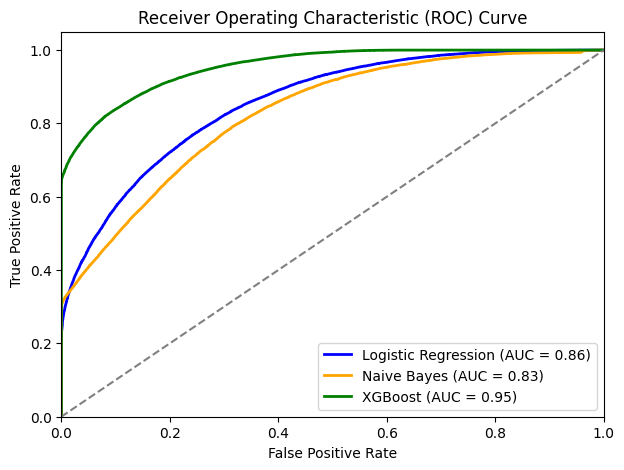

In [50]:
# Plot ROC AUC curves for Logistic Regression, Naive Bayes, and XGBoost
plt.figure(figsize=(7, 5))

# Plot Logistic Regression ROC curve
plt.plot(fpr_lgover, tpr_lgover, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_lgover:.2f})')

# Plot Naive Bayes ROC curve
plt.plot(fpr_nbover, tpr_nbover, color='orange', lw=2, label=f'Naive Bayes (AUC = {auc_nbover:.2f})')

# Plot XGBoost ROC curve
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Plot random line for reference
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [51]:
# Calculate confusion matrix
confusion_mat = confusion_matrix(Y_test_over1, y_pred_xgb)
tn, fp, fn, tp = confusion_mat.ravel()


# Calculate False Alarm Rate (FAR)
false_alarm_rate = fp / (fp + tn)

# Print metrics
print('False Alarm Rate:', false_alarm_rate)

False Alarm Rate: 0.10754032381010459


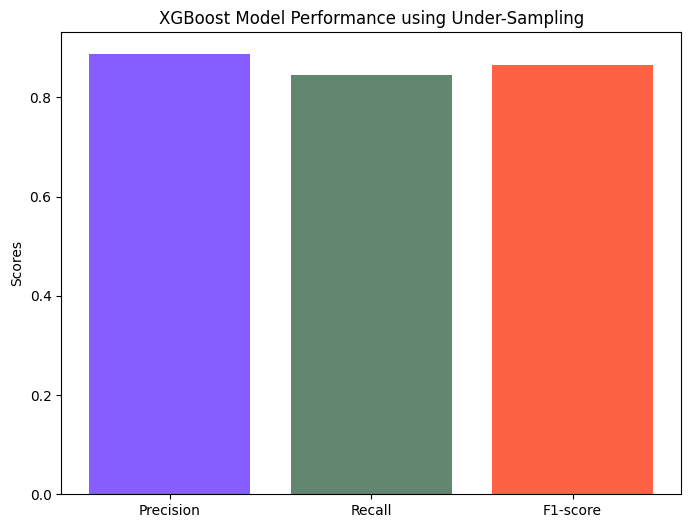

In [52]:

colors = ['#865DFF', '#61876E', '#FE6244']  # Update colors here ['#865DFF', '#FFC6D3']

# Calculate confusion matrix
# Compute classification report
report = classification_report(Y_test_over1, y_pred_xgb, output_dict=True)
precision = report['1']['precision']
recall = report['1']['recall']
f1 = report['1']['f1-score']

# Create a bar chart
labels = ['Precision', 'Recall', 'F1-score']
scores = [precision, recall, f1]
x = np.arange(len(labels))

# Increase size of chart
plt.figure(figsize=(8, 6))

plt.bar(x, scores, color=colors)
plt.xticks(x, labels)
plt.ylabel('Scores')
plt.title('XGBoost Model Performance using Under-Sampling')
plt.show()


In [ ]:
# Build the ANN model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(units=64, activation='relu', input_dim=X_train_over1.shape[1]))
model.add(Dense(units=32, activation='relu'))


# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

# Train the model
model.fit(X_train_over1, Y_train_over1, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set
#y_pred = model.predict_classes(X_test_over1)
#confusion = confusion_matrix(Y_test_over1, y_pred)
#class_report = classification_report(Y_test_over1, y_pred)

# Predict probabilities
y_pred_proba = model.predict(X_test_over1)

# Apply threshold for class prediction (adjust threshold as needed)
threshold = 0.7
y_pred = (y_pred_proba > threshold).astype(int)

# Calculate confusion matrix and classification report
confusion = confusion_matrix(Y_test_over1, y_pred)
class_report = classification_report(Y_test_over1, y_pred)

print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(class_report)


Epoch 1/10
10917/10917 [==============================] - 8s 663us/step - loss: 0.3393 - recall: 0.8398
Epoch 2/10
10917/10917 [==============================] - 7s 667us/step - loss: 0.2596 - recall: 0.8708
Epoch 3/10
10917/10917 [==============================] - 7s 656us/step - loss: 0.2373 - recall: 0.8762
Epoch 4/10
10917/10917 [==============================] - 7s 665us/step - loss: 0.2268 - recall: 0.8776
Epoch 5/10
10917/10917 [==============================] - 7s 653us/step - loss: 0.2192 - recall: 0.8793
Epoch 6/10
10917/10917 [==============================] - 7s 671us/step - loss: 0.2135 - recall: 0.8797
Epoch 7/10
10917/10917 [==============================] - 7s 656us/step - loss: 0.2088 - recall: 0.8786
Epoch 8/10
10917/10917 [==============================] - 7s 666us/step - loss: 0.2059 - recall: 0.8783
Epoch 9/10
10917/10917 [==============================] - 7s 655us/step - loss: 0.2030 - recall: 0.8779
Epoch 10/10
2730/2730 [==============================] - 1s 519u

In [53]:
#import numpy as np
#import pickle

# Load the trained XGBoost classifier
#with open('xgb_classifier.pkl', 'rb') as model_file:
    #xgb_classifier = pickle.load(model_file)

# Mapping for "yes" and "no"
yes_no_mapping = {"yes": 1, "no": 0}

# Collect user inputs
high_bp = input("High Blood Pressure (yes/no): ").lower()
high_chol = input("High Cholesterol (yes/no): ").lower()
chol_check = input("Cholesterol Check (yes/no): ").lower()
smoker = input("Smoker (yes/no): ").lower()
stroke = input("Stroke (yes/no): ").lower()
Veggies = input("Veggies (yes/no): ").lower()
heart_disease = input("Heart Disease or Attack (yes/no): ").lower()
AnyHealthcare = input("AnyHealthcare (yes/no): ").lower()
Fruits = input("Fruits (yes/no): ").lower()
NoDocbcCost = input("NoDocbcCost (yes/no): ").lower()
BMI = float(input("BMI: "))
Income = float(input("Income: "))
Ment_Hlth = float(input("Ment_Hlth: "))
GenHlth = float(input("GenHlth: "))

Phys_Hlth = float(input("Phys_Hlth: "))

# Map categorical inputs to 1 or 0
high_bp = yes_no_mapping.get(high_bp, -1)
high_chol = yes_no_mapping.get(high_chol, -1)
chol_check = yes_no_mapping.get(chol_check, -1)
smoker = yes_no_mapping.get(smoker, -1)
stroke = yes_no_mapping.get(stroke, -1)
heart_disease = yes_no_mapping.get(heart_disease, -1)
AnyHealthcare = yes_no_mapping.get(AnyHealthcare, -1)
Fruits = yes_no_mapping.get(Fruits, -1)
NoDocbcCost = yes_no_mapping.get(NoDocbcCost, -1)
Veggies = yes_no_mapping.get(Veggies, -1)

# Check if any input was invalid
if any(val == -1 for val in [high_bp, high_chol, chol_check, smoker, stroke, heart_disease, AnyHealthcare, Fruits, NoDocbcCost, Veggies]):
    print("Invalid input detected. Please provide 'yes' or 'no' for categorical inputs.")
else:
    # Convert the collected inputs to a list
    input_data = [high_bp, high_chol, chol_check, smoker, stroke, heart_disease, AnyHealthcare, GenHlth, Fruits, NoDocbcCost, Veggies, Phys_Hlth, Ment_Hlth, BMI,Income]

    # Convert the input data to a numpy array
    X_input = np.array([input_data])

    # Make predictions on reshaped input data
    y_pred_xgb = xgb_classifier.predict(X_input)

    # Print the prediction
    if y_pred_xgb[0] == 1:
        print("Patient has diabetes.")
    else:
        print("Patient does not have diabetes.")


High Blood Pressure (yes/no): yes
High Cholesterol (yes/no): yes
Cholesterol Check (yes/no): no
Smoker (yes/no): no
Stroke (yes/no): no
Veggies (yes/no): no
Heart Disease or Attack (yes/no): no
AnyHealthcare (yes/no): no
Fruits (yes/no): no
NoDocbcCost (yes/no): no
BMI: 8
Income: 5
Ment_Hlth: 4
GenHlth: 3
Phys_Hlth: 5
Patient has diabetes.


In [ ]:
import pickle

In [ ]:
# Save the trained model to a file named 'model.pkl'
with open('xgb_classifier.pkl', 'wb') as model_file:
    pickle.dump(xgb_classifier, model_file)